# IMPORTS

In [1]:
%run notebook_setup.ipynb

In [1]:
%run wish_dataset_2_class_def.ipynb

# time each type of similarity measure

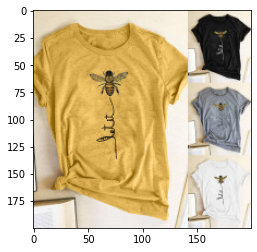

KeyboardInterrupt: 

exception calling callback for <Future at 0x22470370ee0 state=finished returned list>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError:

In [377]:
###############################################################################
# initialize
###############################################################################
d=Dataset()

###############################################################################
# time each type measure singly
###############################################################################
st=time.time()
sim_raw_do_fsim = d.img_similarity_all(loc=3,do_fsim=True) # 1091.9723105430603
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_issm = d.img_similarity_all(loc=3,do_issm=True) # 43.62554740905762
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_psnr = d.img_similarity_all(loc=3,do_psnr=True) # 10.773506164550781
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_rmse = d.img_similarity_all(loc=3,do_rmse=True) # 14.554333209991455
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_sam = d.img_similarity_all(loc=3,do_sam=True) # 16.528496980667114
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_sre = d.img_similarity_all(loc=3,do_sre=True) # 12.952892541885376
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_ssim = d.img_similarity_all(loc=3,do_ssim=True) # 38.041083097457886
et=time.time()
print(et-st)

st=time.time()
sim_raw_do_uiq = d.img_similarity_all(loc=3,do_uiq=True)
et=time.time()
print(et-st)

# time fastest couple of measures

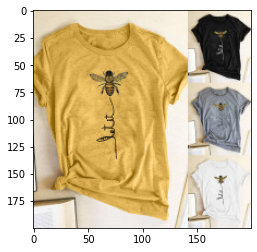

68.32038164138794


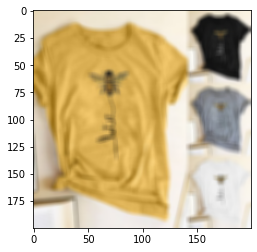

54.0634822845459


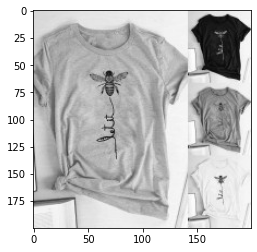

79.71285247802734


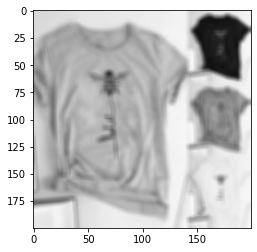

62.13159966468811


In [3]:
###############################################################################
# initialize
###############################################################################
d=Dataset()

###############################################################################
# time fastest couple of measures
###############################################################################
st=time.time()
sim_raw = d.img_similarity_all(loc=3) # 83.10340213775635
et=time.time()
print(et-st)

st=time.time()
sim_blur = d.img_similarity_all(loc=3,blur=True) # 80.66669917106628
et=time.time()
print(et-st)

st=time.time()
sim_grayscale = d.img_similarity_all(loc=3,grayscale=True,plot_tgt=True) # 113.59069466590881
et=time.time()
print(et-st)

st=time.time()
sim_grayscale_blur = d.img_similarity_all(loc=3,grayscale=True,blur=True) # 74.6272337436676
et=time.time()
print(et-st)

# plot `IMG_SIMILARITY_DF`s

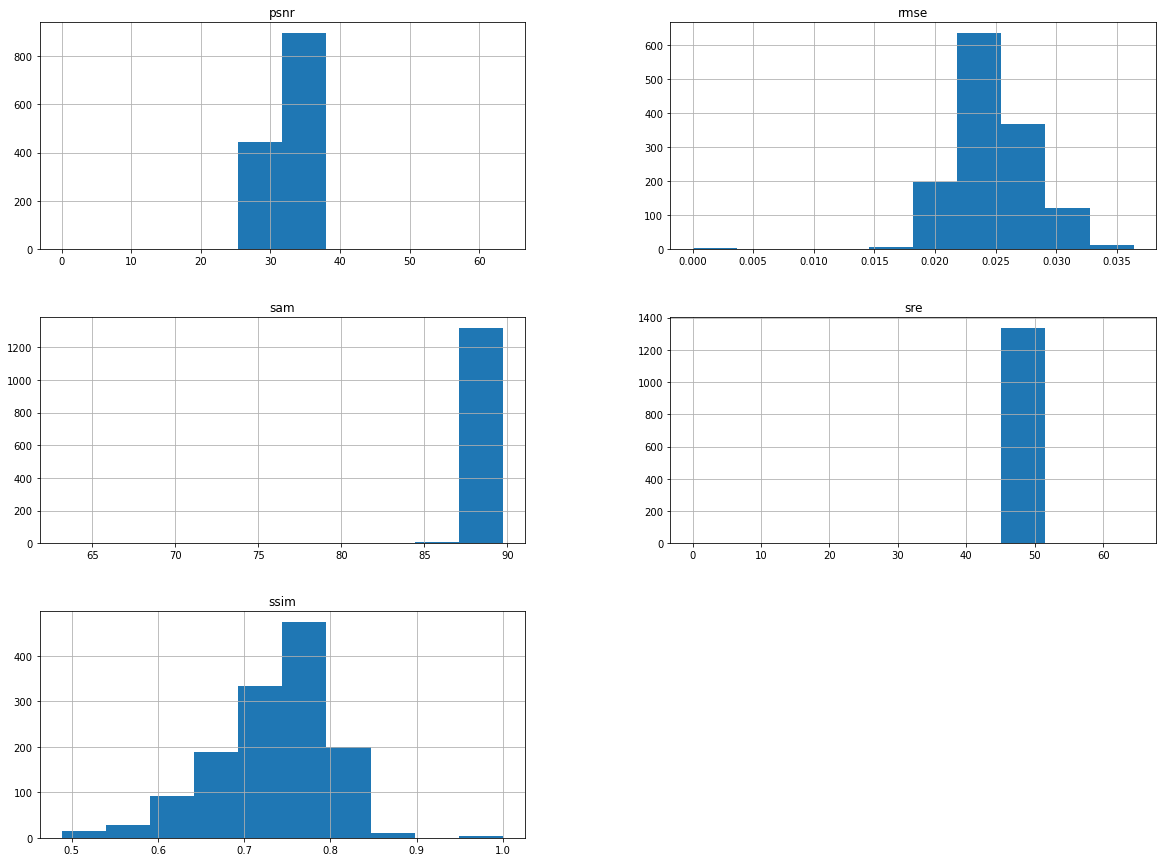

In [4]:
d.img_similarity_plot(sim_raw)

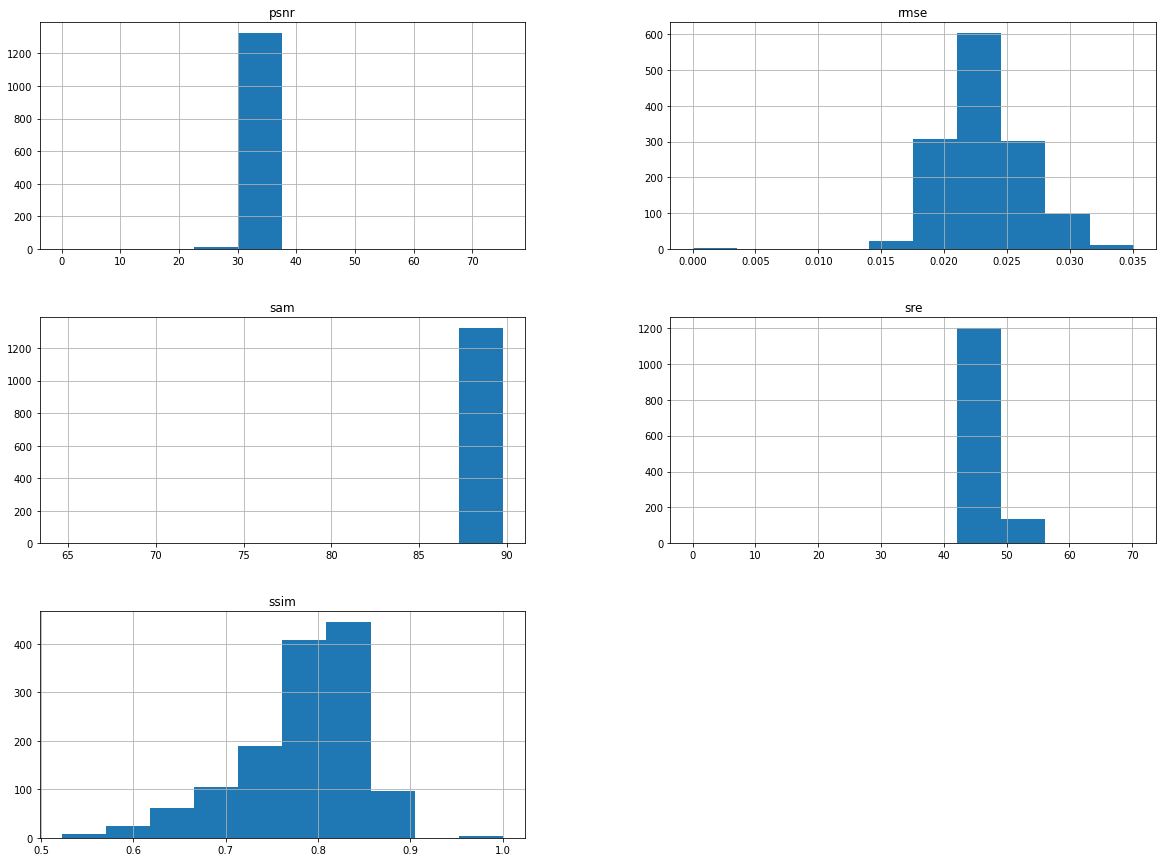

In [5]:
d.img_similarity_plot(sim_blur)

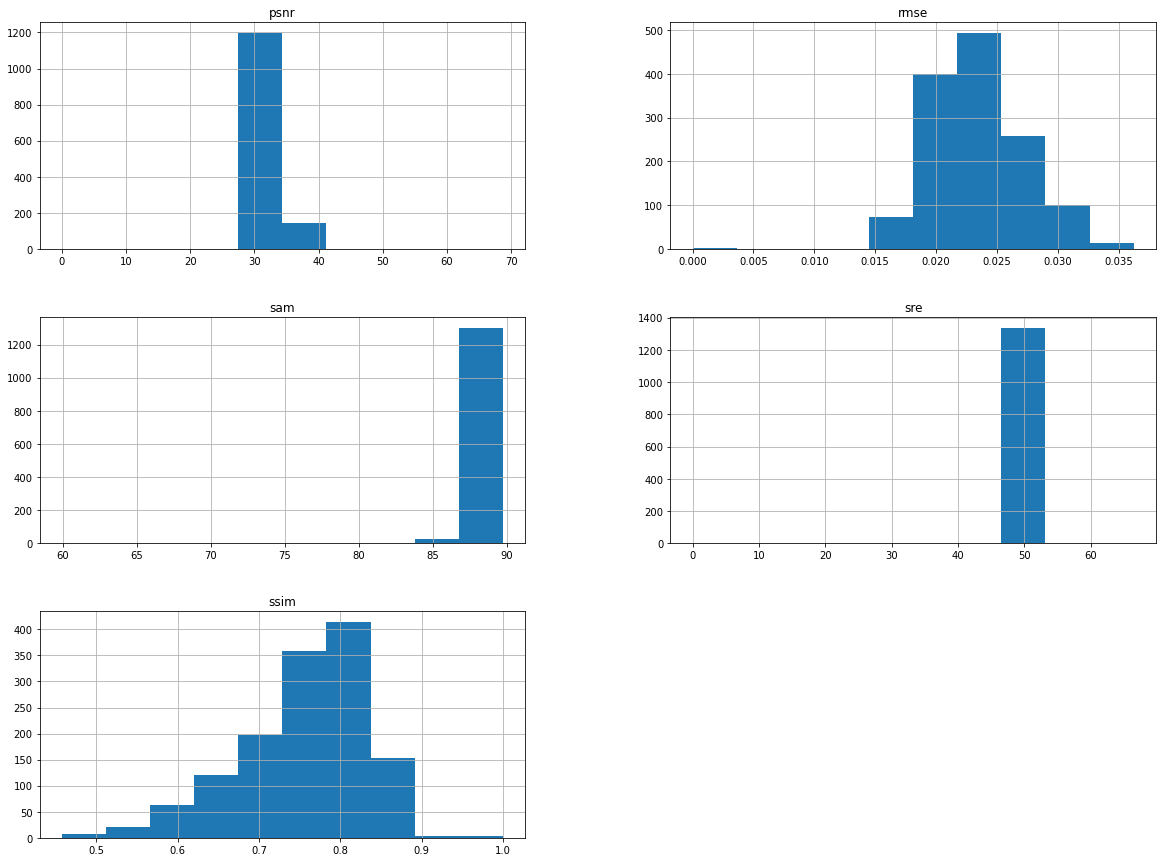

In [6]:
d.img_similarity_plot(sim_grayscale)

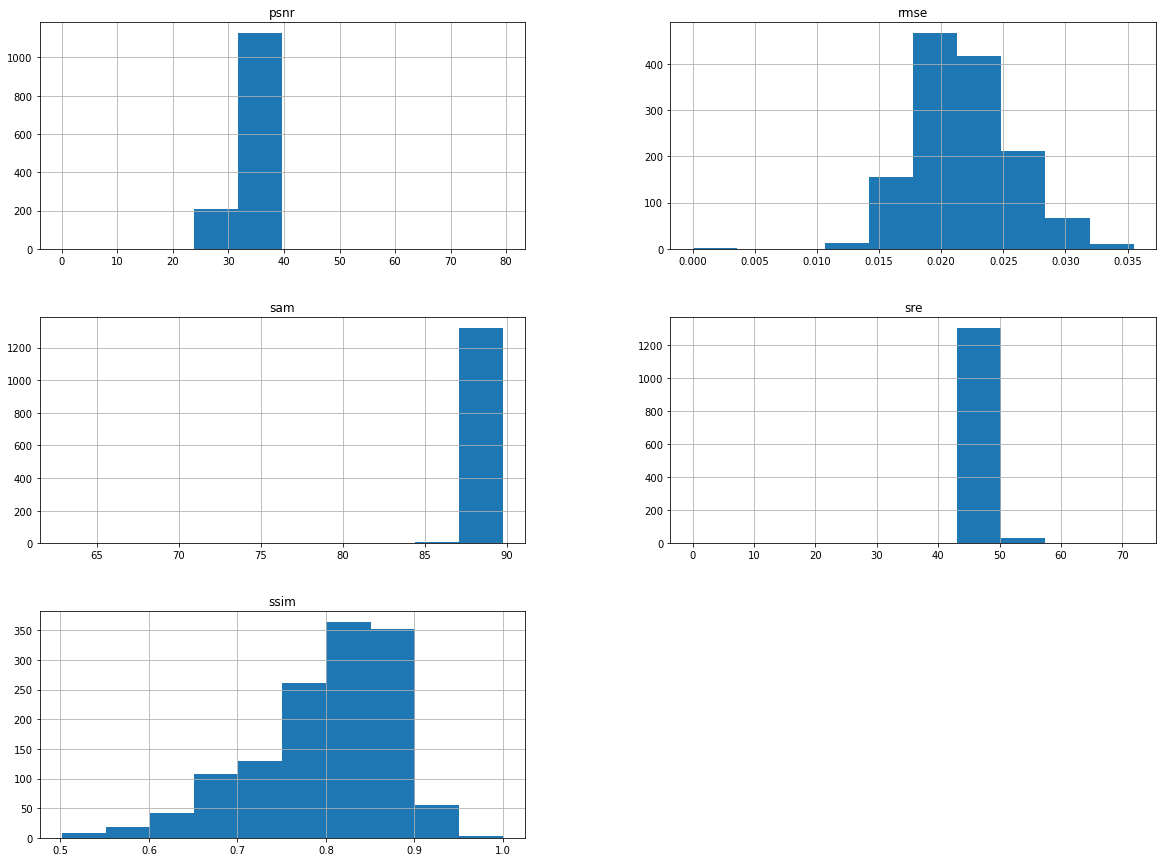

In [7]:
d.img_similarity_plot(sim_grayscale_blur)

# look at top 10 chosen by each measure

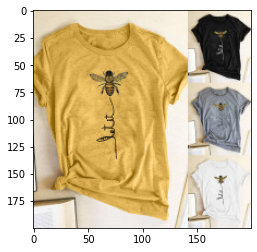

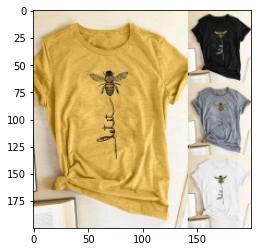

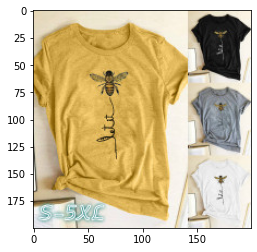

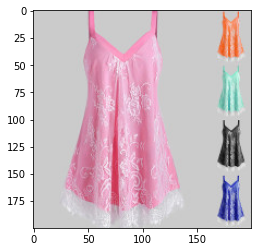

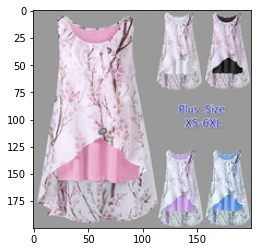

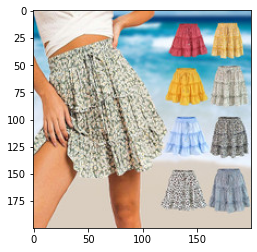

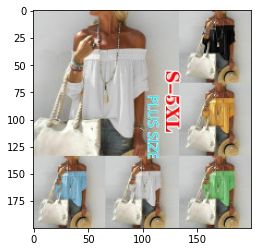

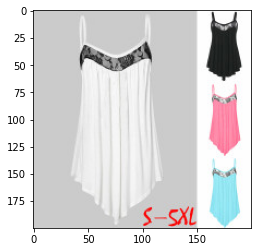

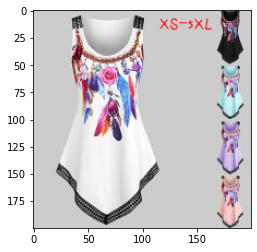

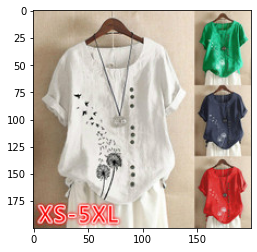

In [8]:
[d.get_product_picture(loc=x) for x in sim_grayscale_blur['psnr'].sort_values(ascending=False)[:10].index];

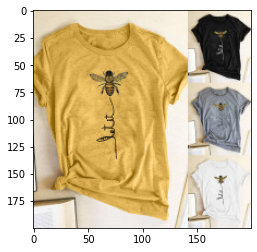

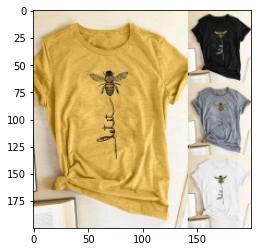

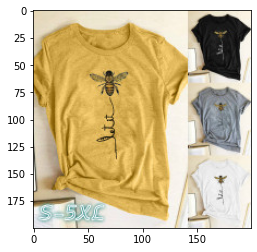

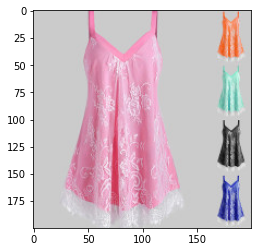

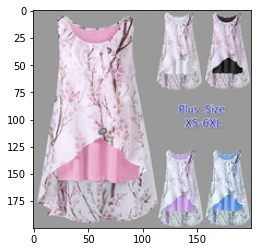

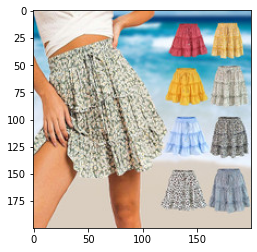

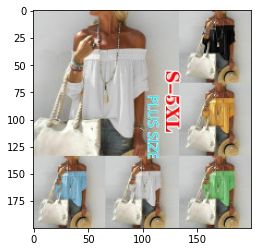

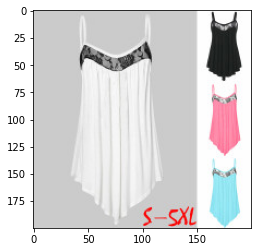

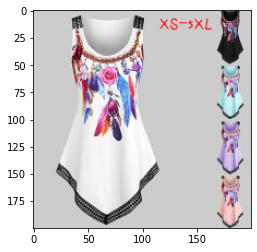

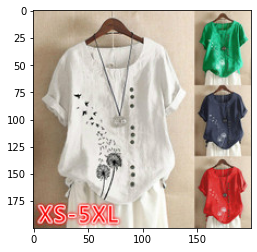

In [10]:
[d.get_product_picture(loc=x) for x in sim_grayscale_blur['rmse'].sort_values(ascending=True)[:10].index];

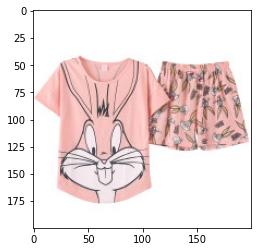

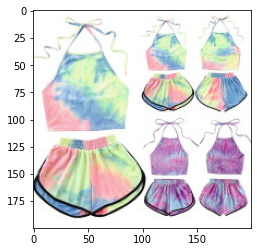

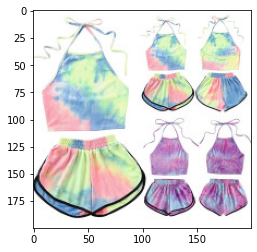

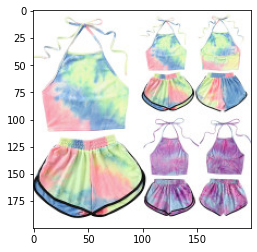

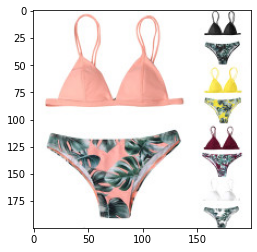

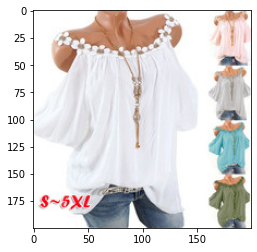

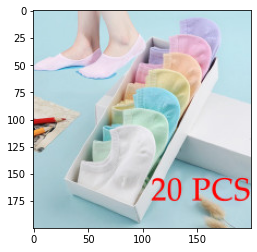

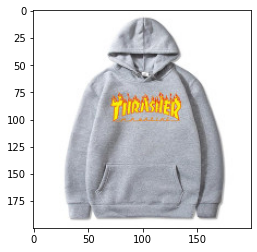

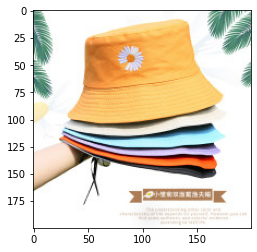

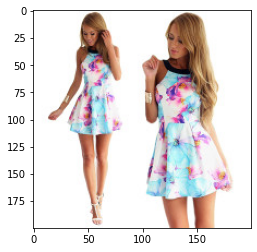

In [11]:
[d.get_product_picture(loc=x) for x in sim_grayscale_blur['sam'].sort_values(ascending=False)[:10].index];

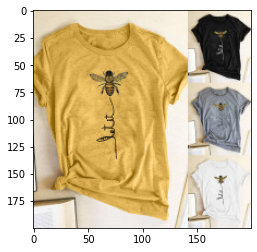

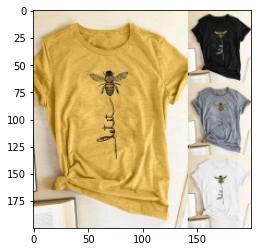

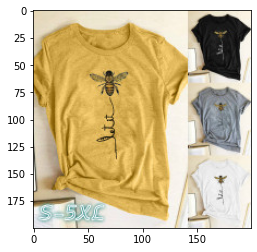

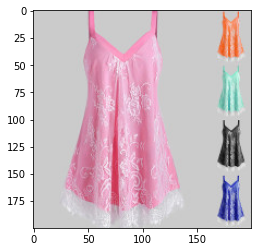

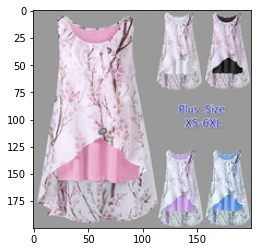

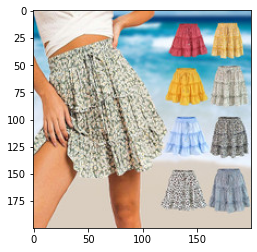

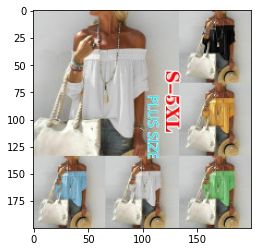

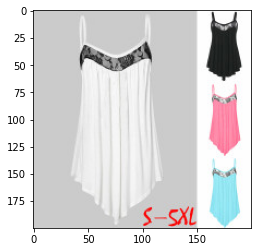

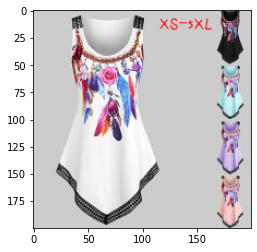

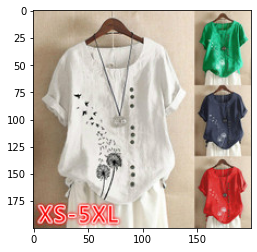

In [12]:
[d.get_product_picture(loc=x) for x in sim_grayscale_blur['sre'].sort_values(ascending=False)[:10].index];

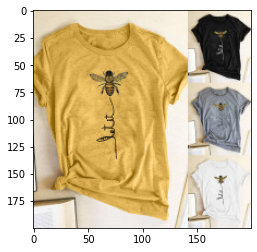

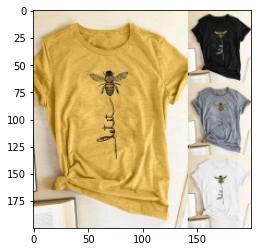

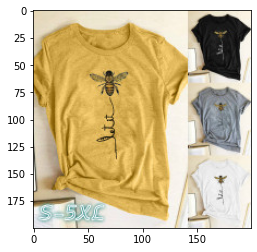

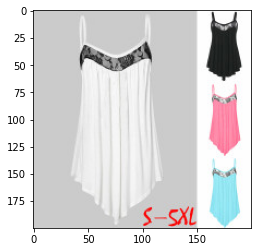

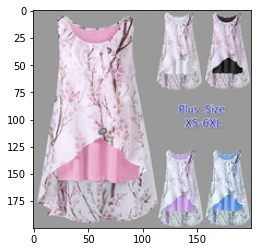

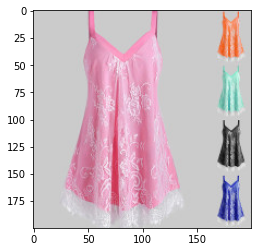

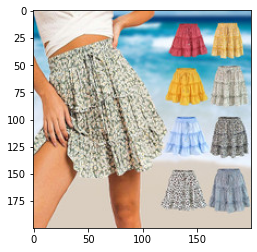

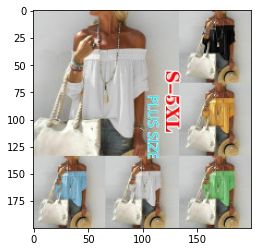

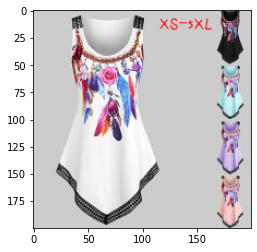

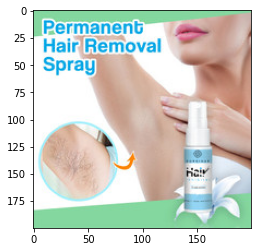

In [13]:
[d.get_product_picture(loc=x) for x in sim_grayscale_blur['ssim'].sort_values(ascending=False)[:10].index];

# try using all measures at the same time

In [14]:
all_merged=pd.DataFrame(
    [
        sim_raw['psnr'].rank(ascending=False),
        sim_raw['rmse'].rank(ascending=True),
        sim_raw['sam'].rank(ascending=False),
        sim_raw['sre'].rank(ascending=False),
        sim_raw['ssim'].rank(ascending=False),
    ],
).transpose().min(axis=1)

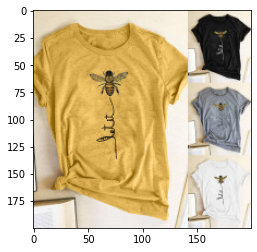

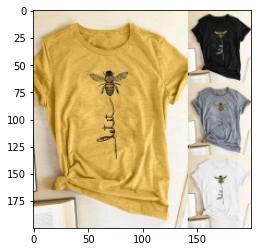

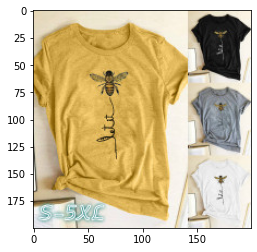

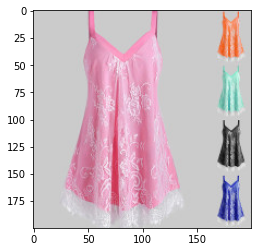

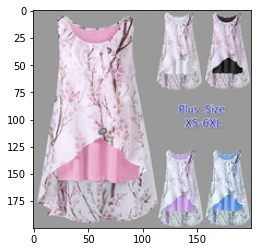

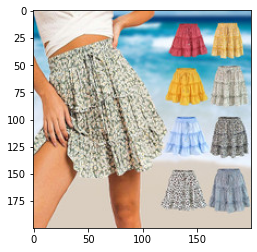

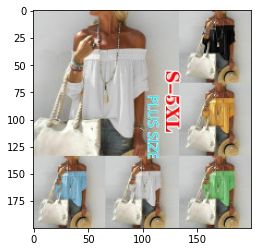

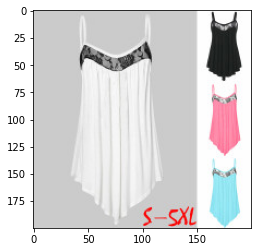

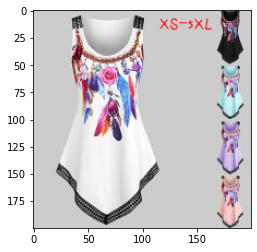

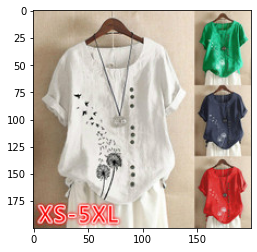

In [15]:
(lambda x:[d.get_product_picture(loc=idx) for idx in x.sort_values(ascending=True)[:10].index])(sim_grayscale_blur['psnr'].rank(ascending=False));

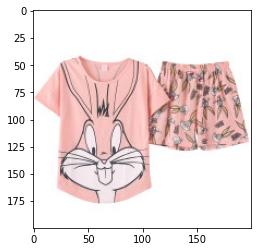

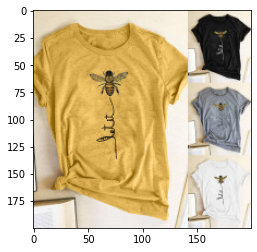

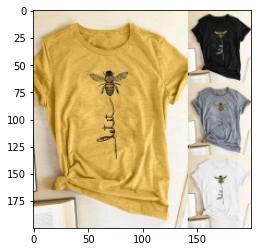

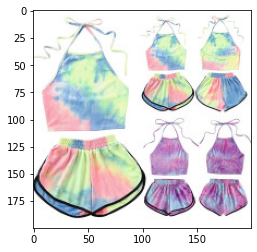

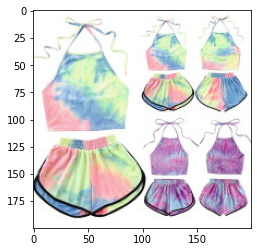

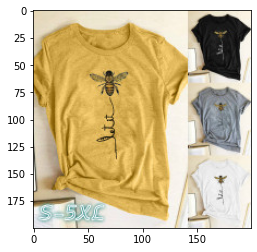

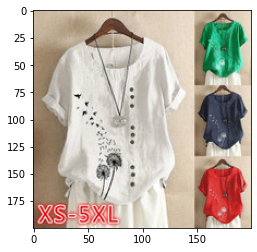

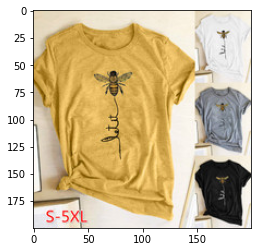

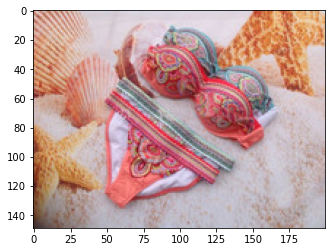

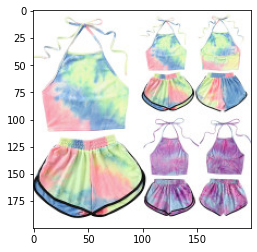

In [16]:
(lambda x:[d.get_product_picture(loc=idx) for idx in x.sort_values(ascending=True)[:10].index])(all_merged.sort_values(ascending=True));